In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print(tf.__version__)
print(pd.__version__)

2.17.0
2.2.3


In [2]:
sales_df = pd.read_csv("C:\\Users\\dluce\\Desktop\\CursoTensorFlow\\datasets\\SalesData.csv")
sales_df.reset_index(drop = True, inplace = True)
print(sales_df)

     Temperature     Revenue
0      24.566884  534.799028
1      26.005191  625.190122
2      27.790554  660.632289
3      20.595335  487.706960
4      11.503498  316.240194
..           ...         ...
495    22.274899  524.746364
496    32.893092  755.818399
497    12.588157  306.090719
498    22.362402  566.217304
499    28.957736  655.660388

[500 rows x 2 columns]


In [3]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


<Axes: xlabel='Temperature', ylabel='Revenue'>

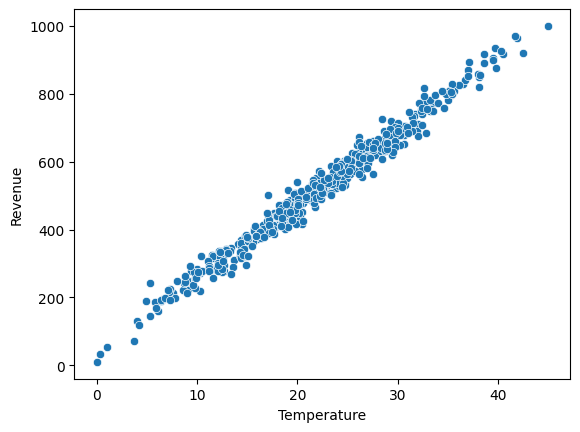

In [4]:
sns.scatterplot(x=sales_df['Temperature'], y=sales_df['Revenue'])

In [5]:
x_train = sales_df['Temperature']
y_train = sales_df['Revenue']

In [6]:
# Criação do modelo Sequential
model = tf.keras.Sequential()

# Adicionando a camada de entrada com Input
model.add(tf.keras.layers.Input(shape=[1]))

# Adicionando a camada densa
model.add(tf.keras.layers.Dense(units=10))

model.add(tf.keras.layers.Dense(units=1))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')
epochs_hist = model.fit(x_train, y_train, epochs= 500)

Epoch 1/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 235949.3125
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12890.6973
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4697.1211
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1710.3336
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 794.2129
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 622.7369
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 684.2430
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 673.4683
Epoch 9/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 619.4845
Epoch 10/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 670.6442
Epoch 11/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 613.0050 
Epoch 12/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 639.1332
Epoch 13/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 730.2415
Epoch 14/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 661.1998
Epoch 15/500
16/16 ━━━━━━━━━━━━━━━━

In [8]:
epochs_hist.history.keys()

dict_keys(['loss'])

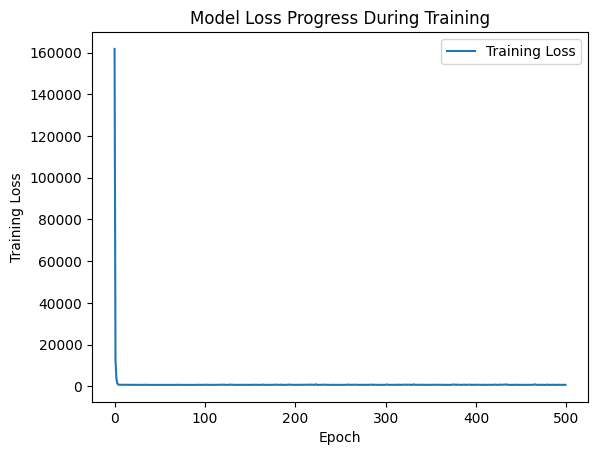

In [9]:
plt.plot(epochs_hist.history['loss'])
plt.title("Model Loss Progress During Training")
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss']);

In [10]:
model.get_weights()

[array([[ 5.2237500e-02, -5.4696113e-02,  1.9231696e+00,  2.7858396e+00,
          4.8116881e-01, -2.2897115e-03,  7.5318599e-03,  7.4827760e-02,
         -8.8833703e-04,  3.1099396e+00]], dtype=float32),
 array([-1.6456034 ,  1.5464015 ,  4.1762733 ,  4.7670703 ,  2.8764074 ,
         0.06184931, -0.22090156, -2.1234293 ,  0.02599231,  4.967037  ],
       dtype=float32),
 array([[ 5.0377562e-03],
        [ 6.3631176e-03],
        [ 2.1356370e+00],
        [ 2.7321625e+00],
        [ 5.6846976e-01],
        [-4.6798316e-04],
        [ 1.8638311e-03],
        [-8.1673022e-03],
        [-2.0458311e-04],
        [ 3.0523994e+00]], dtype=float32),
 array([6.58196], dtype=float32)]

In [23]:
temp_c = 5
temp_f = model.predict(np.array([[temp_c]]))
print(temp_f)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[152.76128]]


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


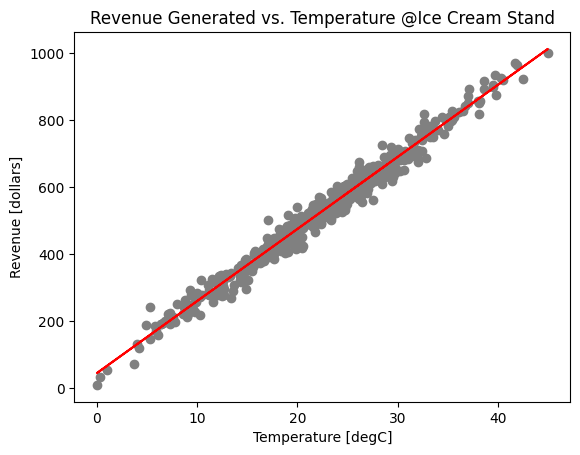

In [12]:
plt.scatter(x_train, y_train, color = 'gray')
plt.plot(x_train, model.predict(x_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand');

In [13]:
print(x_train.shape)

(500,)


In [14]:
x_train = x_train.values.reshape(-1, 1)
print(x_train.shape)

(500, 1)


In [15]:
y_train = y_train.values.reshape(-1, 1)
print(x_train.shape)

(500, 1)


In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [17]:
regressor.coef_

array([[21.44362551]])

In [18]:
regressor.intercept_

array([44.83126709])

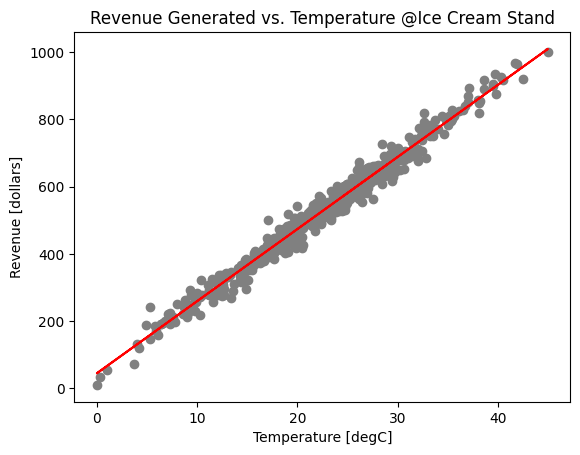

In [21]:
plt.scatter(x_train, y_train, color = 'gray')
plt.plot(x_train, regressor.predict(x_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand');

In [22]:
temp = 5
revenue = regressor.predict([[temp]])
print('Revenue Predictions Using Trained ANN =', revenue)

Revenue Predictions Using Trained ANN = [[152.04939464]]
